## Descripton

The data includes information about the top-rated books on Goodreads, as determined by user ratings and reviews.
The notebook responds to the following questions

1. Which books have the highest average star ratings? Which books have the lowest?
2. What is the distribution of star ratings for all the books in the dataset? Are there any patterns or trends in the distribution?
3. Which authors have the most books in the top-rated list? Are there any genres or themes that are particularly popular among the top-rated books?
4. What is the correlation between the number of ratings and the number of reviews for each book? Are books with more ratings also more likely to have more reviews?
5. Are there any relationships between the number of ratings or reviews and the star rating of the book? Do books with more ratings or reviews tend to have higher or lower star ratings?

In this notebook, we are using the "Goodreads All Time Greatest Books 8k Data" which can be found [here](https://www.kaggle.com/datasets/azim069/goodreads-all-time-greatest-books-8k-data)

### Import dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read the data from CSV and name the dataframe as df
df=pd.read_csv("./Goodreads All Time Greatest Books 8k Data.csv")

### Data Exploration

In [6]:
#load the 5 first rows of data to have a quick look.

df.head()

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,To Kill a Mockingbird,Harper Lee,4.27,"5,623,473","108,722","2,927,118","1,669,471","730,317","192,620","103,947"
1,1984,George Orwell,4.19,"4,134,439","98,891","1,956,290","1,345,678","588,373","158,757","85,341"
2,Fahrenheit 451,Ray Bradbury,3.97,"2,181,792","64,728","788,776","777,014","438,256","123,939","53,807"
3,Animal Farm,George Orwell,3.98,"3,521,050","81,746","1,310,631","1,229,834","676,221","200,989","103,375"
4,The Hobbit,J.R.R. Tolkien,4.28,"3,612,605","62,476","1,930,001","1,047,617","439,072","118,631","77,284"


In [7]:
#inspect the last 5 rows

df.tail()

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
7801,Winter in the Blood,James Welch,3.84,"3,536",355,"1,006","1,361",850,234,85
7802,The Inextinguishable Symphony: A True Story of...,Martin Goldsmith,4.20,"1,011",121,442,391,129,39,10
7803,The Moon Is Down,John Steinbeck,3.92,"25,470","2,068","7,210","10,651","6,135","1,188",286
7804,Ο ιππότης με τη σκουριασμένη πανοπλία,Robert Fisher,3.80,"22,768","1,830","7,278","7,169","5,555","1,951",815
7805,Coolie,Mulk Raj Anand,3.80,810,82,187,353,209,46,15


In [9]:
# See how big is the data
df.shape

(7806, 10)

The data contains 7806 rows and 10 columns

In [10]:
#Inspect the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     7806 non-null   object 
 1   Author        7806 non-null   object 
 2   Average_star  7806 non-null   float64
 3   Ratings       7806 non-null   object 
 4   Reviews       7806 non-null   object 
 5   5_Star        7806 non-null   object 
 6   4_Star        7806 non-null   object 
 7   3_Star        7806 non-null   object 
 8   2_Star        7806 non-null   object 
 9   1_Star        7806 non-null   object 
dtypes: float64(1), object(9)
memory usage: 610.0+ KB


Upon inspection, the book name and author columns data types are of object type. The average star is a float data type, while the other columns are of object type which is wrong. The columns need to be converted to int type to allow for subsequent analysis. The error has been caused by the commas, which act as the thousand seperator. To fix this, we can use the str.replace() method to remove the commas from the values before converting them to integers. 

In [13]:
#Change the data type of the ratings, reviews and star columns
df['Ratings'] = df['Ratings'].str.replace(',', '').astype(int)
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(int)
df['5_Star'] = df['5_Star'].str.replace(',', '').astype(int)
df['4_Star'] = df['4_Star'].str.replace(',', '').astype(int)
df['3_Star'] = df['3_Star'].str.replace(',', '').astype(int)
df['2_Star'] = df['2_Star'].str.replace(',', '').astype(int)
df['1_Star'] = df['1_Star'].str.replace(',', '').astype(int)

In [14]:
#Inspect again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     7806 non-null   object 
 1   Author        7806 non-null   object 
 2   Average_star  7806 non-null   float64
 3   Ratings       7806 non-null   int32  
 4   Reviews       7806 non-null   int32  
 5   5_Star        7806 non-null   int32  
 6   4_Star        7806 non-null   int32  
 7   3_Star        7806 non-null   int32  
 8   2_Star        7806 non-null   int32  
 9   1_Star        7806 non-null   int32  
dtypes: float64(1), int32(7), object(2)
memory usage: 396.5+ KB


### Data Cleaning

In [15]:
#check for missing data in the columns
def check_missing_data(df):
    """
    Check for missing data in the columns of a pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing data.
    
    Returns:
    pandas.DataFrame: A DataFrame showing the count and percentage of missing values for each column.
    """
    # Get the count and percentage of missing values for each column
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    
    # Combine the count and percentage into a single DataFrame
    missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
    
    # Sort the DataFrame by percentage of missing values in descending order
    missing_data = missing_data[missing_data['Count'] > 0].sort_values('Percent', ascending=False)
    
    # Return the missing data DataFrame
    return missing_data


In [16]:
missing_data = check_missing_data(df)
print(missing_data)

Empty DataFrame
Columns: [Count, Percent]
Index: []


There is no missing data in the columns, which can also be ascertained by the 'isna()' method, which returns false, indicating that values are not missing. 

In [18]:
df.isna()

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7801,False,False,False,False,False,False,False,False,False,False
7802,False,False,False,False,False,False,False,False,False,False
7803,False,False,False,False,False,False,False,False,False,False
7804,False,False,False,False,False,False,False,False,False,False


In [20]:
#check for missing data in the rows
def find_missing_rows(df):
    """Finds rows with missing values in a pandas DataFrame"""
    null_rows = df[df.isnull().any(axis=1)]
    if null_rows.empty:
        print("No rows with missing values")
    else:
        print(null_rows)
find_missing_rows(df)

No rows with missing values


# Descriptive Statistics

In [21]:
#Get a quick summary of the data
df.describe()

,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
count,7806.000000,7.806000e+03,7806.000000,7.806000e+03,7.806000e+03,7.806000e+03,7806.000000,7806.000000
mean,4.018515,4.545232e+04,1651.837048,1.965059e+04,1.486187e+04,7.928684e+03,2073.846016,937.330515
std,0.273727,2.288467e+05,5614.056447,1.188569e+05,6.804682e+04,3.446933e+04,10143.449114,5490.670271
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.850000,1.104250e+03,75.000000,3.850000e+02,3.710000e+02,2.090000e+02,48.000000,15.000000
50%,4.030000,5.318500e+03,315.000000,1.901500e+03,1.821000e+03,1.055500e+03,246.000000,80.000000
75%,4.200000,2.230650e+04,1139.750000,8.226750e+03,7.804750e+03,4.336250e+03,1027.000000,347.000000
max,5.000000,9.159410e+06,144817.000000,5.943341e+06,2.105678e+06,1.014721e+06,311433.000000,165743.000000


### Which books have the highest average star ratings? Which books have the lowest? 

In [22]:
# Sort the DataFrame by 'Average_star' column in descending order
sorted_df = df.sort_values(by='Average_star', ascending=False)

# Print the top 10 books with the highest average star ratings
print(sorted_df[['Book_Name', 'Author', 'Average_star']].head(10))

# Print the top 10 books with the lowest average star ratings
print(sorted_df[['Book_Name', 'Author', 'Average_star']].tail(10))


                                              Book_Name  \
7644  Symbiosis and Separation: Towards a Psychology...   
7294     Before You're A Stranger: New & Selected Poems   
6641                 Fla-Flu e as multidões despertaram   
6013  The Book of James, Faith, Love & Hope: An Expo...   
6462                          Flights from the Lowlands   
662                                       Siete Minutos   
6568       Cien Rostros de María, para la contemplación   
7356                                 Onder Duitse Knoet   
5192  Yucatán y los orígenes del nuevo estado mexica...   
3552                                 Ποιήματα 1978-1987   

                          Author  Average_star  
7644      Richard A. Koenigsberg           5.0  
7294              Raymond Fraser           5.0  
6641            Nelson Rodrigues           5.0  
6013            Spiros Zodhiates           5.0  
6462        Florence Morris Rose           5.0  
662        Ismael Camacho Arango           5.0  
6568   

### What is the distribution of star ratings for all the books in the dataset? Are there any patterns or trends in the distribution? 

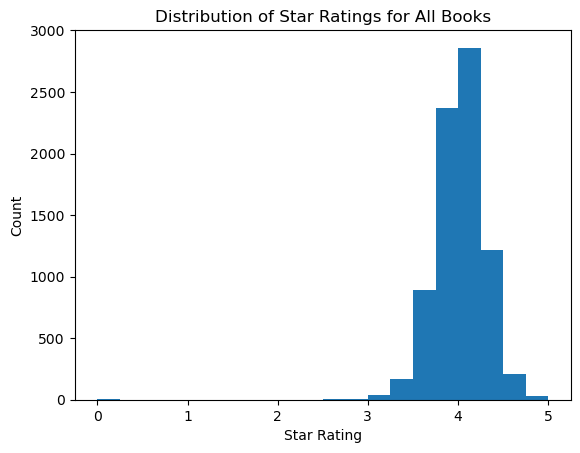

In [25]:
#Plot a histogram of 'Average_star' column
plt.hist(df['Average_star'], bins=20)
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings for All Books')
plt.show()

The distribution of star ratings for all the books in the dataset appears to be right-skewed or positively skewed, with a concentration of ratings between 3 and 5, and the majority of the ratings being 4.

The fact that the distribution is right-skewed suggests that there are more books with higher ratings than lower ratings. The concentration of ratings between 3 and 5 indicates that users tend to rate books positively, with very few books receiving ratings below 3. The majority of ratings being 4 suggests that users are generally satisfied with the books they read, but there is still some variability in the ratings.

### Which authors have the most books in the top-rated list? 

In [27]:
#GROUP the dataset by author and the count of books each has
top_books_by_author = df.groupby('Author')['Book_Name'].count().reset_index()
top_books_by_author = top_books_by_author.rename(columns={'Book_Name': 'Num_Top_Books'})
top_books_by_author = top_books_by_author.sort_values('Num_Top_Books', ascending=False)

In [28]:
#
top_authors = top_books_by_author.head(10)
print(top_authors)

               Author  Num_Top_Books
3482     V.C. Andrews             43
3274     Stephen King             39
30    Agatha Christie             39
2817   Philip K. Dick             36
470        C.S. Lewis             32
3379  Terry Pratchett             27
620           Colette             24
2689   P.G. Wodehouse             24
1480     Isaac Asimov             24
1984   K.A. Applegate             24


### What is the correlation between the number of ratings and the number of reviews for each book? Are books with more ratings also more likely to have more reviews?

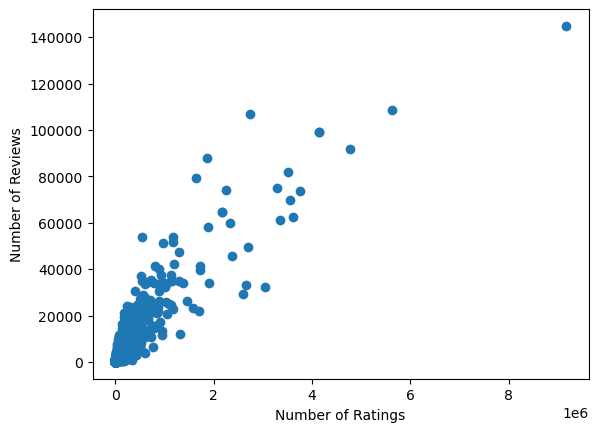

In [29]:
#Plot a scatter plot
plt.scatter(df['Ratings'], df['Reviews'])
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Reviews')
plt.show()

In [30]:
#Calculate the correlation coefficient
corr = df['Ratings'].corr(df['Reviews'])
print("Correlation coefficient: ", corr)

Correlation coefficient:  0.9054820776480227


Based on the scatter plot and correlation coefficient, we can see that there is a positive correlation between the number of ratings and the number of reviews, indicating that books with more ratings are more likely to have more reviews.

### Are there any relationships between the number of ratings or reviews and the star rating of the book? Do books with more ratings or reviews tend to have higher or lower star ratings?

In [31]:
#calculate the correlation coefficients between the number of ratings/reviews and the average star rating. 
corr_matrix = df[['Average_star', 'Ratings', 'Reviews']].astype(float).corr()
print(corr_matrix)

              Average_star   Ratings   Reviews
Average_star      1.000000  0.062416  0.056337
Ratings           0.062416  1.000000  0.905482
Reviews           0.056337  0.905482  1.000000


The correlation between Average_star and Ratings is positive and weak (0.0624), indicating that there is a small positive relationship between the average star rating of a book and the number of ratings it has received.

The correlation between Average_star and Reviews is also positive and weak (0.0563), indicating that there is a small positive relationship between the average star rating of a book and the number of reviews it has received.

Finally, as earlier noted, the correlation between Ratings and Reviews is strong and positive (0.9055), indicating a high positive relationship between the number of ratings and the number of reviews a book has received. This suggests that books that are more popular and have more ratings are also more likely to have more reviews.

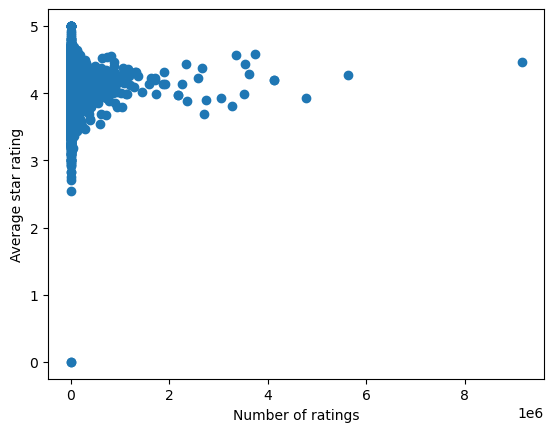

In [32]:
#create a scatterplot of the number of ratings vs. the average star rating 
plt.scatter(df['Ratings'], df['Average_star'])
plt.xlabel('Number of ratings')
plt.ylabel('Average star rating')
plt.show()

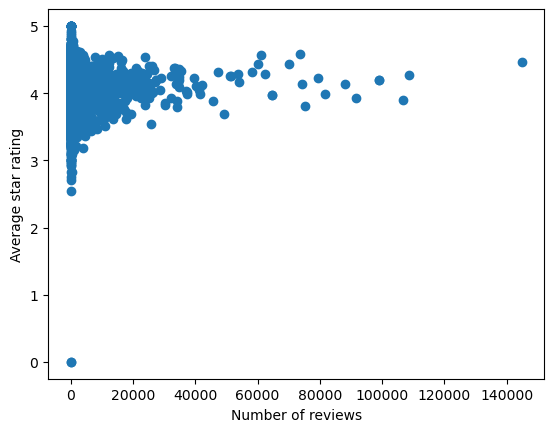

In [33]:
#Create a scatterplot of the number of reviews vs average star rating
plt.scatter(df['Reviews'], df['Average_star'])
plt.xlabel('Number of reviews')
plt.ylabel('Average star rating')
plt.show()
